1. Perform sentiment analysis on the dataset. Display the sentiment polarity and word cloud to show what are the most talk about the hotel and the services.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read dataset

data = pd.read_csv('Hotel_Reviews.csv', encoding = 'ISO-8859-1')
data.head()

,dateAdded,dateUpdated,categories,primaryCategories,city,country,name,reviews.date,reviews.rating,reviews.text,reviews.title,reviews.username
0,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Paula
1,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,D
2,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,Ron
3,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",jaeem2016
4,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,MamaNiaOne


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dateAdded          10000 non-null  object 
 1   dateUpdated        10000 non-null  object 
 2   categories         10000 non-null  object 
 3   primaryCategories  10000 non-null  object 
 4   city               10000 non-null  object 
 5   country            10000 non-null  object 
 6   name               10000 non-null  object 
 7   reviews.date       10000 non-null  object 
 8   reviews.rating     10000 non-null  float64
 9   reviews.text       9999 non-null   object 
 10  reviews.title      9999 non-null   object 
 11  reviews.username   10000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 937.6+ KB


In [5]:
# Select column data

data = data.iloc[:, [9]]

In [6]:
# Rename column

data = data.rename(columns={'reviews.text': 'Review'})
data

,Review
0,Our experience at Rancho Valencia was absolute...
1,Amazing place. Everyone was extremely warm and...
2,We booked a 3 night stay at Rancho Valencia to...
3,Currently in bed writing this for the past hr ...
4,I live in Md and the Aloft is my Home away fro...
...,...
9995,It is hard for me to review an oceanfront hote...
9996,"I live close by, and needed to stay somewhere ..."
9997,Rolled in 11:30 laid out heads down woke up to...
9998,Absolutely terrible..I was told I was being gi...


In [7]:
# Change datatype to str

data['Review'] = data['Review'].astype(str)

In [8]:
# Remove punctuation, symbols

corpus = []
for i in range(0,10000):
    review = re.sub('[^a-zA-z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
print(corpus)

['experi rancho valencia absolut perfect begin end felt special happi stay would come back heart beat', 'amaz place everyon extrem warm welcom stay top notch place definit top great romant getaway take kid along coupl stuf anim wait girl upon arriv wait go back', 'book night stay rancho valencia play tenni sinc one highest rate tenni resort america place realli top luxuri standpoint overal experi villa realli perfect staff great attent detail includ fresh squeez orang juic morn restaur bar room servic amaz tenni program realli impress well want come back', 'current bed write past hr dog bark squeal call front desk advis basic told noth sleep', 'live md aloft home away home stay night staff great especi olivia extra special rememb voic phone tell alert pay attent custom need thumb', 'stay famili daughter wed accommod staff olivia excel room well maintain would highli recommend hotel especi wed venu celebr bay', 'beauti room nicest peopl work front desk ladi olivia extrem patient help lo

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohdz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Sentiment analyzer

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiments = []
compound_scores = []

for review in corpus:
    sentiment_scores = sia.polarity_scores(review)
    compound_scores.append(sentiment_scores['compound'])

    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    sentiments.append(sentiment)

In [12]:
data['Compound_Score'] = compound_scores
data['Sentiment'] = sentiments
print(data[['Review', 'Sentiment', 'Compound_Score']])

                                                 Review Sentiment  \
0     Our experience at Rancho Valencia was absolute...  positive   
1     Amazing place. Everyone was extremely warm and...  positive   
2     We booked a 3 night stay at Rancho Valencia to...  positive   
3     Currently in bed writing this for the past hr ...   neutral   
4     I live in Md and the Aloft is my Home away fro...  positive   
...                                                 ...       ...   
9995  It is hard for me to review an oceanfront hote...  positive   
9996  I live close by, and needed to stay somewhere ...  positive   
9997  Rolled in 11:30 laid out heads down woke up to...  positive   
9998  Absolutely terrible..I was told I was being gi...  negative   
9999  Filthy, outdated, noisy neighbours, but this w...  negative   

      Compound_Score  
0             0.7506  
1             0.8225  
2             0.9559  
3             0.0000  
4             0.8225  
...              ...  
9995      

In [13]:
# Group sentiments into positive, neutral, and negative

polarity_counts = {'positive': sentiments.count('positive'),
                   'neutral': sentiments.count('neutral'),
                   'negative': sentiments.count('negative')}
polarity_counts

{'positive': 8591, 'neutral': 476, 'negative': 933}

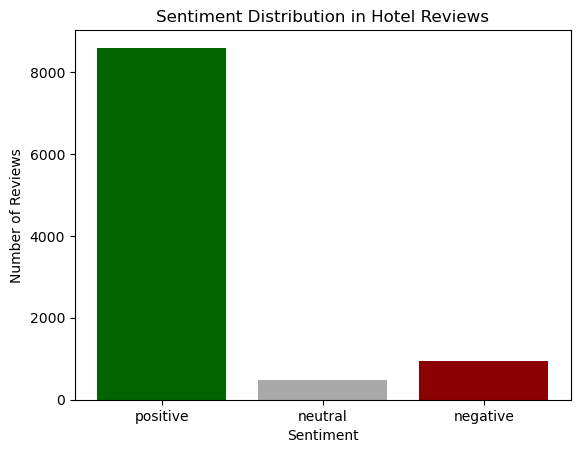

In [14]:
# Plot distribution graph

labels = list(polarity_counts.keys())
counts = list(polarity_counts.values())

plt.bar(labels, counts, color=['darkgreen', 'darkgrey', 'darkred'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution in Hotel Reviews')
plt.show()

In [15]:
# Create Word Cloud

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names_out()

In [17]:
# Calculate word frequencies

word_freq = dict(zip(words, X.toarray().sum(axis=0))) 
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

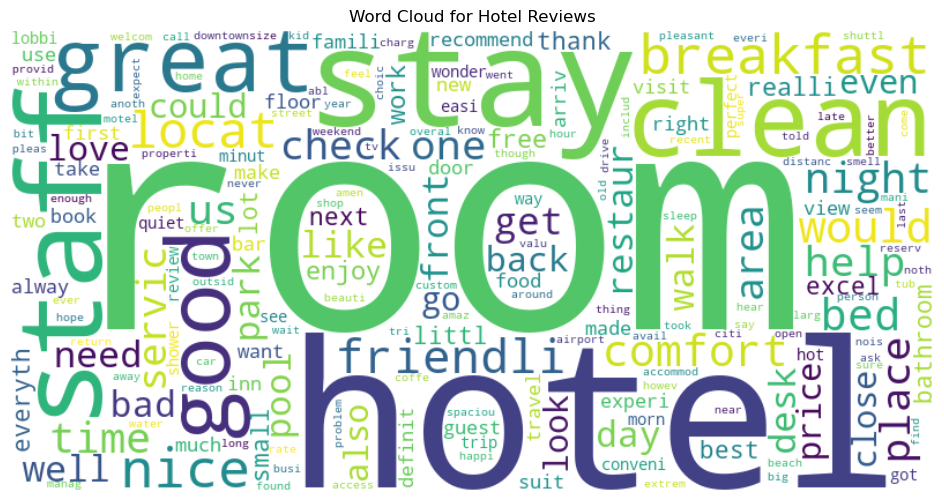

In [18]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Hotel Reviews')
plt.axis('off')
plt.show()

In [19]:
# Classification Algorithm on the Review Sentiment

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [20]:
print(y)

[ 0.7506  0.8225  0.9559 ...  0.8591 -0.6124 -0.7579]


In [21]:
# Analyze sentiment intensity

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data['polarity'] = data['Review'].apply(lambda x: sia.polarity_scores(x))
data.head()

,Review,Compound_Score,Sentiment,polarity
0,Our experience at Rancho Valencia was absolute...,0.7506,positive,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp..."
1,Amazing place. Everyone was extremely warm and...,0.8225,positive,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp..."
2,We booked a 3 night stay at Rancho Valencia to...,0.9559,positive,"{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp..."
3,Currently in bed writing this for the past hr ...,0.0000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,I live in Md and the Aloft is my Home away fro...,0.8225,positive,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."


In [22]:
data[['neg', 'neu', 'pos', 'compound']] = data['polarity'].apply(pd.Series)
data

,Review,Compound_Score,Sentiment,polarity,neg,neu,pos,compound
0,Our experience at Rancho Valencia was absolute...,0.7506,positive,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",0.000,0.669,0.331,0.9162
1,Amazing place. Everyone was extremely warm and...,0.8225,positive,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.000,0.654,0.346,0.9650
2,We booked a 3 night stay at Rancho Valencia to...,0.9559,positive,"{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...",0.000,0.727,0.273,0.9748
3,Currently in bed writing this for the past hr ...,0.0000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,I live in Md and the Aloft is my Home away fro...,0.8225,positive,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.000,0.838,0.162,0.8713
...,...,...,...,...,...,...,...,...
9995,It is hard for me to review an oceanfront hote...,0.7717,positive,"{'neg': 0.021, 'neu': 0.782, 'pos': 0.198, 'co...",0.021,0.782,0.198,0.8999
9996,"I live close by, and needed to stay somewhere ...",0.7717,positive,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.000,0.851,0.149,0.8519
9997,Rolled in 11:30 laid out heads down woke up to...,0.8591,positive,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.000,0.674,0.326,0.9697
9998,Absolutely terrible..I was told I was being gi...,-0.6124,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [23]:
pos = sum(data['pos'])
neg = sum(data['neg'])
neu = sum(data['neu'])
compound = sum(data['compound'])

In [24]:
# Sentiment intensity score

print("positive: ", pos)
print("negative: ", neg)
print("neutral: ", neu)
print("compound: ", compound)

positive:  2321.1230000000005
negative:  500.3839999999988
neutral:  7177.546999999999
compound:  6016.270600000028


In [25]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [26]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohdz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohdz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohdz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
sid = SentimentIntensityAnalyzer()

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
def tokenize_and_filter(text):
    words = word_tokenize(str(text).lower())
    return [word for word in words if word.isalnum() and word not in stop_words]

In [30]:
# Make negative sentiment word cloud

negative_words = []
for review in data['Review']:
    tokens = tokenize_and_filter(review)
    for token in tokens:
        if sid.polarity_scores(token)['compound'] < 0:
            negative_words.append(token)

In [31]:
negative_text = ' '.join(negative_words)

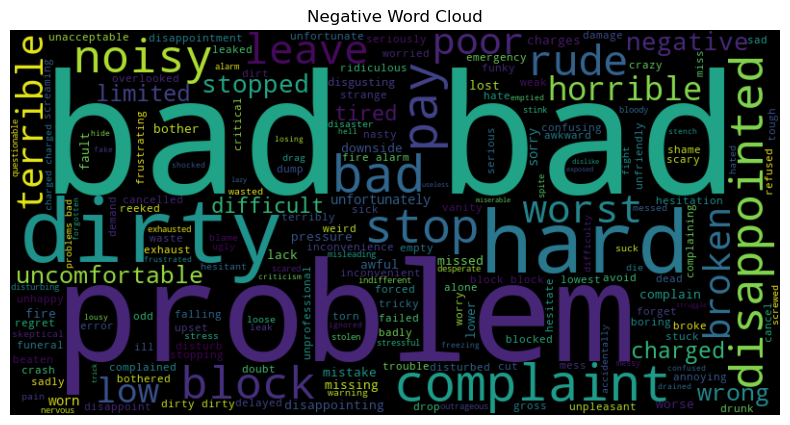

In [32]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')
plt.show()

In [33]:
# Make positive sentiment word cloud

positive_words = []
for review in data['Review']:
    tokens = tokenize_and_filter(review)
    for token in tokens:
        if sid.polarity_scores(token)['compound'] > 0:
            positive_words.append(token)

In [34]:
positive_text = ' '.join(positive_words)

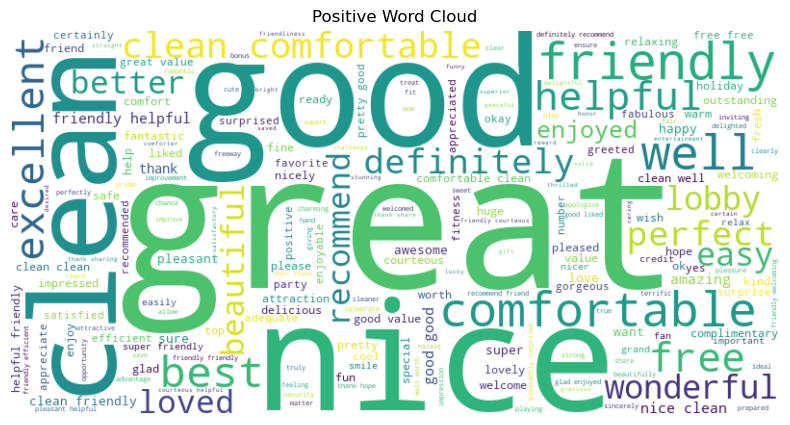

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')
plt.show()

2. Present your findings to the stakeholder, and give suggestions in which area they can improve the service

Based on the negative word cloud generated from the sentiment analysis of hotel reviews, here are some suggestions to address the identified problems:

a) Cleanliness and Maintenance:
Implement stricter cleaning protocols to ensure all areas of the hotel, including rooms, common areas, and facilities, are consistently cleaned and well-maintained. Regular inspections should be conducted to promptly identify and address cleanliness issues—train staff to pay attention to detail and prioritize cleanliness throughout the hotel premises.

b)Room Comfort:
Evaluate the quality of mattresses, bedding, and furniture to ensure guests stay comfortably. Consider investing in room upgrades or renovations to improve the overall comfort and functionality of the accommodations. Address any reported issues with room amenities promptly to enhance the guest experience.

c) Service Quality:
Provide training and development programs for staff to improve their customer service and professionalism. Encourage staff to be attentive, responsive, and proactive in addressing guest needs and concerns. Implement mechanisms for collecting feedback from guests to identify areas for improvement in service delivery.

d)Noise Management:
Identify noise sources within the hotel premises, such as adjacent rooms, common areas, or external factors, and take appropriate measures to mitigate them. Consider implementing soundproofing solutions in rooms and common areas to minimize noise disturbances for guests. Provide clear guidelines and policies regarding noise levels to ensure a comfortable environment for all guests.

e)Value for Money:
Review pricing strategies to ensure room rates are competitive and reflect the overall guest experience. Consider offering value-added services or amenities to enhance guests' perceived value. Communicate the hotel's commitment to guest satisfaction and continuous improvement to justify pricing and to improve guest perceptions of value.

f) Other Recommendations:
Regularly monitor guest feedback and reviews to identify emerging issues and trends, allowing for proactive problem-solving and service improvements. Foster a culture of accountability and ownership among staff to address guest concerns promptly and effectively. Communicate with guests transparently and empathetically when addressing issues or resolving complaints to demonstrate the hotel's commitment to guest satisfaction.